In [1]:
import pandas as pd
import string as st
import math
import matplotlib
import numpy as np
#from datascience import *

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# load dataset as pandas df
data_file = '../data/180213_cogsci_journal_unprocessed.csv'

df_pd = pd.read_csv(data_file)

# fix the article index column name
df_pd.rename(columns={"Unnamed: 0": "Article Index"}, inplace=True)

# NOTE:
# don't fill the column with garbage data, just remove it
#df_pd = df_pd.fillna("Other") 

# drop all rows where 'article_name' is nan
df_pd = df_pd.dropna(how='all', subset=['article_name'])
# need to realign indices to start at 0
df_pd.index=range(len(df_pd.index))

In [3]:
affiliations = df_pd["author_affiliations"].str.lower()
#columns=['Neuro_Science','Psychology','Philosophy','Anthropology','Linguistics','Artificial Intelligence', 'CS', 'CogSci', 'Other', 'Missing', 'Total']
# hexaCount=pd.DataFrame(0, index=np.arange(len(affiliations)), columns=columns)

aff_df = df_pd["author_affiliations"].str.lower()
affiliations = affiliations.tolist()
#aff_df
#df_pd["author_affiliations"]
#print(type(hexaCount[1]))
#hexaCount

In [4]:
# CSV file where each row is a publication type.
# first element of every row is the name of the type

art_types = '../data/Article_Types_V1.csv'
df_art_types = pd.read_csv(art_types, sep=',', header= None)


### Consolidate Publication Types

In [5]:

lst=[[] for _ in range(len(df_art_types))] # makes a list of lists where each sublist is an article type. elem 0 is name, rest elements

#populates list with csv data
for i in range(df_art_types.shape[1]):
        for j in range(df_art_types.shape[0]):
            lst[j].append(df_art_types[i][j])
#removes nan from list of list (it is square by default)           
for a in range(len(lst)):
    lst[a] = [x for x in lst[a] if str(x) != 'nan']

In [6]:
#This function will replace all the inconsistent types of our data set with consolidated types of interest
def ConsolidateType(lst,df_pd):

    oldTypes = df_pd.article_type.values
    newTypes = []
    for i in range(len(oldTypes)):
        # NOTE: index 0 of each sublist of lst is the name of that publication type, not a filter term
        
        for j in range(len(lst)):
            
            if oldTypes[i] in lst[j][1:]:
                
                newTypes.append(lst[j][0])
                break
            elif j == len(lst)-1:
                
                newTypes.append(np.nan)
                
                
    df_pd.article_type = newTypes

In [7]:
ConsolidateType(lst,df_pd)

In [8]:
# removes unwanted types from our dataset
df_pd = df_pd.dropna(how='any', subset=['article_type'])

In [9]:
df_pd.to_csv("../data/Consolidated_Types")

## Affiliations

In [10]:
# This cell will make arrays of hexagonal terms from a csv file
aff_types = pd.read_csv("../data/Affiliation_types_V1.csv", sep=',', header=None)

aff_lst=[[] for _ in range(len(aff_types))] # makes a list of lists where each sublist is a hexagonal type. elem 0 is name, rest elements

#populates list with csv data
for i in range(aff_types.shape[1]):
        for j in range(aff_types.shape[0]):
            aff_lst[j].append(aff_types[i][j])
#removes nan from list of list (it is square by default)           
for a in range(len(aff_lst)):
    aff_lst[a] = [x for x in aff_lst[a] if str(x) != 'nan']
    
#aff_df[i] in aff_lst[j][1:]
#if any(x in str for x in a):
#any(x in aff_lst[0][0:] for x in aff_d

In [11]:
columns = []
for cat in aff_lst:
    columns.append(cat[0])

columns.append('other')
columns.append('missing')
columns.append('total')

In [12]:
#This function will replace all the inconsistent types of our data set with consolidated types of interest
def Consolidate_hex(aff_lst,aff_df, columns):

     # initialize empty hexacount df
    hexaCount=pd.DataFrame(0, index=np.arange(len(aff_df)), columns=columns)

    for i in range(len(aff_df)):
        # NOTE: index 0 of each sublist of lst is the name of that publication type, not a filter term
        if pd.isnull(aff_df.iloc[i]):
            # skip because it's nan
            hexaCount["missing"].iloc[i] = 1
            continue
        
        for j in range(len(aff_lst)):
            for k in range(len(aff_lst[j])):
                
                if aff_lst[j][k] in aff_df.iloc[i]:                    
                    
                    hexaCount.iloc[i][aff_lst[j][0]] += 1
                    continue
        
        # append 1 to other if the row is all 0s here
        if hexaCount.iloc[i].sum()<1.:            
                hexaCount["other"].iloc[i] = 1
            
#                 elif j == len(lst)-1:
#                     print(aff_lst[j])
#                     hexaCount['Other'].iloc[j] += 1
        hexaCount["total"].iloc[i] = hexaCount.iloc[i].sum()

    return hexaCount        

In [13]:
# Build Hexagon
hexaCount = Consolidate_hex(aff_lst, aff_df, columns)

In [14]:
#hexaCount

In [15]:
# def department_count (aff_df, columns):
#     # needs two inputs: the affiliation list (aff_df), and column names (colums)
    
#     # initialize empty hexacount df
#     hexaCount=pd.DataFrame(0, index=np.arange(len(aff_df)), columns=columns)
    
#     # loop through
#     for i in range(len(aff_df)):
#         # ideally, we want to also move this categories to an external datafile
#         if pd.isnull(aff_df.iloc[i]):
#             # checking if the affiliation is just empty
#             hexaCount['Missing'].iloc[i] =1
        
#         else:
#             # not NaN, proceed to hexagonize
#             if "anthropology" in aff_df.iloc[i]:
#                 hexaCount["Anthropology"].iloc[i] += 1

#             if "artificial intelligence" in aff_df.iloc[i]:
#                 hexaCount["Artificial Intelligence"].iloc[i] += 1    

#             if "linguistic" in aff_df.iloc[i]:
#                 hexaCount["Linguistics"].iloc[i] += 1

#             if "neuro science" in aff_df.iloc[i] or "neuroscience" in aff_df.iloc[i]:
#                 hexaCount["Neuro_Science"].iloc[i] += 1

#             if "philosophy" in aff_df.iloc[i]:
#                 hexaCount["Philosophy"].iloc[i] += 1

#             if "psychology" in aff_df.iloc[i]:
#                 hexaCount["Psychology"].iloc[i] += 1
            
#             if "computer" in aff_df.iloc[i]:
#                 hexaCount["CS"].iloc[i] += 1

#             if "cognitive science" in aff_df.iloc[i]:
#                 hexaCount["CogSci"].iloc[i] += 1
                
#             if hexaCount.iloc[i].sum()<1.:            
#                 hexaCount["Other"].iloc[i] = 1
    
#             hexaCount["Total"].iloc[i] = hexaCount.iloc[i].sum()

#     return hexaCount

In [16]:
# # building the hexagon
# hexaCount = department_count(aff_df, columns)

### Check to see which affiliations got filed under which category

In [17]:
hexaCount.iloc[759]

anthropology               2
artificial intelligence    0
linguistics                2
neuroscience               0
philosophy                 0
psychology                 3
computer science           0
cognitive science          0
other                      0
missing                    0
total                      7
Name: 759, dtype: int64

In [18]:
pd.options.display.max_colwidth = 200
print(columns)
query_hex = columns[3]
cols_to_disp=['author_affiliations']
print('Querying:', query_hex, '\n---\n')
print(df_pd[cols_to_disp].loc[hexaCount[query_hex]==1].to_string())

['anthropology', 'artificial intelligence', 'linguistics', 'neuroscience', 'philosophy', 'psychology', 'computer science', 'cognitive science', 'other', 'missing', 'total']
Querying: neuroscience 
---

                                                                                                                                                                                          author_affiliations
475                                                                                                                               Carnegie Mellon University and the Center for the Neural Basis of Cognition
523                                              Department of Neurology, University of Maryland School of Medicine, 12-011 Bressler Research Building, 655 W Baltimore Street, Baltimore, MD 21201-1559, USA
530                Department of Psychology, Franklin & Marshall College, Lancaster, PA 17604, USA\n             School of Cognitive Science, Hampshire College, Amherst, MA 01002, 

### Append hexaCount to original dataframe

In [19]:
pd_concat = pd.concat([df_pd, hexaCount], axis=1)

In [20]:
pd_concat

,article_index,article_name,year,volume,issue,pages,month,doi,article_type,authors,...,artificial intelligence,linguistics,neuroscience,philosophy,psychology,computer science,cognitive science,other,missing,total
0,2.0,Why Cognitive Science,1977.0,1.0,1,1-2,January,10.1207/s15516709cog0101_1,Original_Article,Allan Collins,...,0,0,0,0,0,0,0,0,1,0
1,3.0,"An Overview of KRL, a Knowledge Representation Language",1977.0,1.0,1,3-46,January,10.1207/s15516709cog0101_2,Original_Article,"Daniel G. Bobrow1,* and\nTerry Winograd2",...,0,0,0,0,0,0,0,1,0,1
2,4.0,Human and Computational Question Answering†,1977.0,1.0,1,47-73,January,10.1207/s15516709cog0101_3,Original_Article,Wendy Lehnert*,...,0,0,0,0,0,0,0,1,0,1
3,5.0,Definite Descriptions and Semantic Memory†,1977.0,1.0,1,74-83,January,10.1207/s15516709cog0101_4,Original_Article,Andrew Ortony* and\nRichard C. Anderson,...,0,0,0,0,0,0,0,1,0,1
4,6.0,"Artificial Intelligence, Language, and the Study of Knowledge†‡",1977.0,1.0,1,84-123,January,10.1207/s15516709cog0101_5,Original_Article,Professor Ira Goldstein* and\nSeymour Papert,...,0,0,0,0,0,1,0,0,0,1
5,7.0,Induction of Augmented Transition Networks†,1977.0,1.0,2,125-157,April,10.1207/s15516709cog0102_1,Original_Article,John R. Anderson*,...,0,0,0,0,0,0,0,1,0,1
6,8.0,Decision Theory and Artificial Intelligence II: The Hungry Monkey†,1977.0,1.0,2,158-192,April,10.1207/s15516709cog0102_2,Original_Article,"Jerome A. Feldman1,* and\nRobert F. Sproull2",...,0,0,0,0,0,0,0,1,0,1
7,9.0,Problem Solving in Semantically Rich Domains: An Example from Engineering Thermodynamics†,1977.0,1.0,2,193-215,April,10.1207/s15516709cog0102_3,Original_Article,R. Bhaskar and\nHerbert A. Simon*,...,0,0,0,0,0,0,0,1,0,1
8,10.0,"Verbs, Time, and Modality†",1977.0,1.0,2,216-234,April,10.1207/s15516709cog0102_4,Original_Article,M. J. Steedman*,...,0,0,0,0,0,0,0,1,0,1
9,11.0,What Sort of Taxonomy of Causation Do We Need for Language Understanding?†,1977.0,1.0,3,235-264,July,10.1207/s15516709cog0103_1,Original_Article,Yorick Wilks,...,0,0,0,0,0,0,0,1,0,1


### Visualize
Now we can visualize hexagon values.

Text(0.5,1,'Sum over all years')

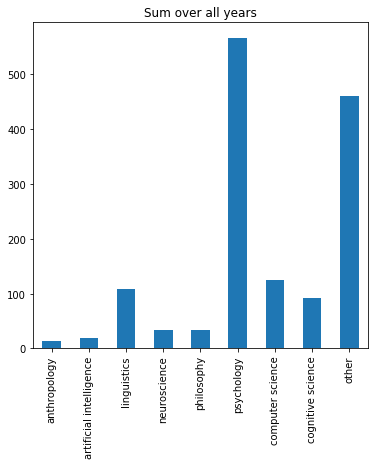

In [21]:
#pd_concat[['year'] + columns]

# plot hexagon normalized by total (0:-2 indexing to exclude columns missing and total)
hex_normed = pd_concat[columns[:-2]].div(pd_concat['total'], axis='rows')
hex_normed.sum().plot(kind='bar', figsize=(6,6))
plt.xticks(rotation=90)
plt.title('Sum over all years')

In [22]:
hex_normed.groupby(pd_concat['year']).size()

year
1977.0     15
1978.0     17
1979.0     16
1980.0     17
1981.0     14
1982.0     11
1983.0     12
1984.0     16
1985.0     17
1986.0     17
1987.0     18
1988.0     17
1989.0     21
1990.0     20
1991.0     16
1992.0     16
1993.0     27
1994.0     16
1995.0     15
1996.0     15
1997.0     14
1998.0     16
1999.0     20
2000.0     20
2001.0     28
2002.0     27
2003.0     40
2004.0     46
2005.0     40
2006.0     42
2007.0     34
2008.0     48
2009.0     63
2010.0     68
2011.0     58
2012.0     70
2013.0     62
2014.0     65
2015.0     81
2016.0     84
2017.0    151
2018.0     13
dtype: int64

Text(0.5,1,'Hexagon normed, and proportion per year')

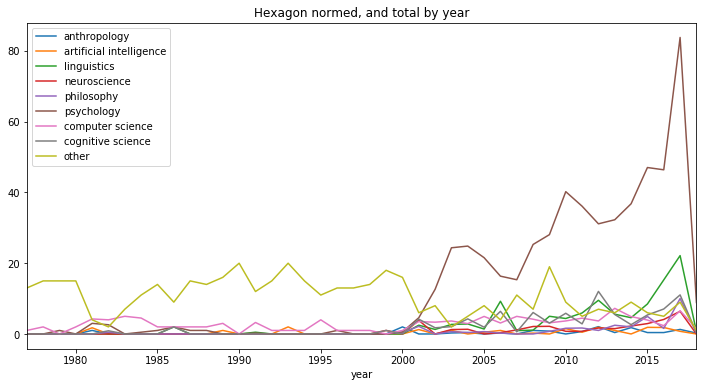

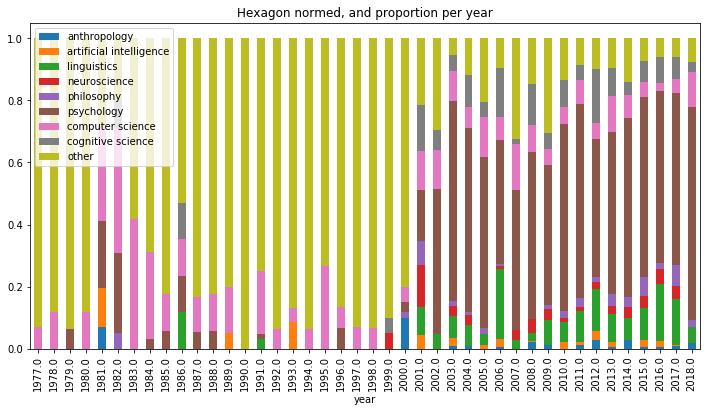

In [23]:
# this plots sum per year, which means it sums to the total # of articles written that year
hex_normed.groupby(pd_concat['year']).sum().plot(figsize=(12,6))
plt.title('Hexagon normed, and total by year')

# this plots mean per year, which means it normalizes by the number of articles written per year
#hex_normed.groupby(pd_concat['year']).mean().plot(figsize=(12,6))
hex_normed.groupby(pd_concat['year']).mean().plot(kind='bar', stacked=True, figsize=(12,6))
#plt.yscale('log')
plt.title('Hexagon normed, and proportion per year')

# pd.groupby is a function that collects rows based on some criteria, in this case, the year of the article
# you guys can figure out how to groupby decades or per 5 years

## Show paper titles from each hexagonal term

In [24]:
# Anthropology
pd_concat[pd_concat.anthropology > 0].article_name.values

array(['The Cultural Part of Cognition',
       'Primate Cognition: Introduction to the Issue',
       'Representing Space and Objects in Monkeys and Apes',
       'A construction based analysis of child directed speech',
       "Children's attributions of beliefs to humans and God: cross-cultural evidence",
       'How Known Constructions Influence the Acquisition of Other Constructions: The German Passive and Future Constructions',
       'Understanding Mortality and the Life of the Ancestors in Rural Madagascar',
       'Lexically Restricted Utterances in Russian, German, and English Child-Directed Speech',
       'Fishing for the Right Words: Decision Rules for Human Foraging Behavior in Internal Search Tasks',
       '“Frequent Frames” in German Child-Directed Speech: A Limited Cue to Grammatical Categories',
       'Cross-Cultural Similarities and Differences in Person-Body Reasoning: Experimental Evidence From the United Kingdom and Brazilian Amazon',
       'Quantity Recognitio

In [25]:
# Artificial Intelligence
pd_concat[pd_concat["artificial intelligence"] > 0].article_name.values

array(['The Progressive Construction of Mind',
       'Mathematical Model Building in the Solution of Mechanics Problems: Human Protocols and the MECHO Trace',
       'Self-Explanations: How Students Study and Use Examples in Learning to Solve Problems',
       'Situativity and Symbols: Response to Vera and Simon',
       'Situated Action: A Neuropsychological Interpretation Response to Vera and Simon',
       'Detecting deception: adversarial problem solving in a low base-rate world',
       'Learning from human tutoring',
       'Instance-based learning in dynamic decision making',
       'Modeling Parallelization and Flexibility Improvements in Skill Acquisition: From Dual Tasks to Complex Dynamic Skills',
       'Formalization and Analysis of Reasoning by Assumption',
       'Observing Tutorial Dialogues Collaboratively: Insights About Human Tutoring Effectiveness From Vicarious Learning',
       'The Interactive Evolution of Human Communication Systems',
       'The Logical Proble

In [26]:
# psychology
pd_concat[pd_concat.psychology > 0].article_name.values

array([ 'Micro- and Macrodevelopmental Changes in Language Acquisition and Other Representational Systems†',
       'Data-Driven Discovery of Physical Laws',
       "Errors in Children's Subtraction",
       'Structure and Strategy in Image Generation†',
       'Simulating a Skilled Typist: A Study of Skilled Cognitive-Motor Performance',
       "Challenging “Early Competence”: A Process Oriented Analysis of Children's Classifying",
       'A Model of the Time Course and Content of Reading†',
       'Models of Concepts†',
       'Languages and Designs for Probability Judgment†',
       'A Developmental Neural Model of Visual Word Perception',
       'Systematicity and Surface Similarity in the Development of Analogy',
       'An Incremental Procedural Grammar for Sentence Formulation', nan,
       'Dual Space Search During Scientific Reasoning',
       'A computer model of the temporal course of agrammatic sentence understanding: The effects of variation in severity and sentence comple

In [27]:
# philosophy
pd_concat[pd_concat.philosophy > 0].article_name.values

array(['Ideal Learning Machines†', nan, nan,
       'Toward a Science of Other Minds: Escaping the Argument by Analogy',
       'Integrating structure and meaning: a distributed model of analogical mapping',
       'Is perception informationally encapsulated? The issue of the theory-ladenness of perception',
       'Multidisciplinarity and cognitive science',
       'The bicoherence theory of situational irony',
       'Intrinsic cognitive models',
       'Feature centrality and property induction',
       'Semantic Interpretation as Computation in Nonmonotonic Logic: The Real Meaning of the Suppression Task',
       'Is the Brain a Quantum Computer?',
       'Explanatory Pluralism in Cognitive Science',
       'Perception With Compensatory Devices: From Sensory Substitution to Sensorimotor Extension',
       'The Evolution of Relevance', 'The Rumelhart Prize at 10',
       'Perceiving the Present: Systematization of Illusions or Illusion of Systematization?',
       'Cross-Situational

In [28]:
# Linguistics
pd_concat[pd_concat.linguistics > 0].article_name.values

array([ 'The Scan-Copier Mechanism and the Positional Level of Language Production: Evidence from Phonemic Paraphasia',
       'How much Do People Remember? Some Estimates of the Quantity of Learned Information in Long-term Memory',
       'A computer model of the temporal course of agrammatic sentence understanding: The effects of variation in severity and sentence complexity',
       'Comparative visual search: a difference that makes a difference',
       'New approaches to the neural basis of speech sound processing: introduction to special section on brain and speech',
       'Pure word deafness and the bilateral processing of the speech code',
       'Levels of representation in the electrophysiology of speech perception',
       'Partial and total-order planning: evidence from normal and prefrontally damaged populations',
       'The distributional structure of grammatical categories in speech to young children',
       'Overtensing and the effect of regularity',
       'Learnin

In [29]:
# neuroscience
#select rows where anthro # > 0 -> article name
pd_concat[pd_concat.neuroscience > 0].article_name.values

array([nan,
       'A Connectionist Approach to Word Reading and Acquired Dyslexia: Extension to Sequential Processing',
       'Integrating structure and meaning: a distributed model of analogical mapping',
       'A computational model of frontal lobe dysfunction: working memory and the Tower of Hanoi task',
       'New approaches to the neural basis of speech sound processing: introduction to special section on brain and speech',
       'Pure word deafness and the bilateral processing of the speech code',
       'The role of inferior frontal cortex in phonological processing',
       "Classifying adults' and children's faces by sex: computational investigations of subcategorical feature encoding",
       'Partial and total-order planning: evidence from normal and prefrontally damaged populations',
       'Towards structural systematicity in distributed, statically bound visual representations',
       'ERP evidence for task modulations on face perceptual processing at different spat

In [38]:
# OTHER
#aff_df[pd_concat.other > 0]

pd_concat[pd_concat.other > 0][pd_concat.year>2000].author_affiliations
#pd_concat.columns

/Users/rdgao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


504                                                                                              University of Pennsylvania, Graduate School of Education, 3700 Walnut Street, Philadelphia, PA 19104-6216, USA
505                                                                                                                                                             Carnegie Mellon University, Pittsburgh, PA, USA
511                                                                                                                                                                                  Carnegie Mellon University
513                  School of Kinesiology, University of Illinois at Chicago, 901 W. Roosevelt Road, Chicago, IL 60608-1516, USA\n             Catholic University of Leuven, FLOK, K.U. Leuven, 3001 Hever...
517                                                        Washington University One, Brookings Drive, St. Louis, MO 63130, USA\n             Wolfson College, Oxford Un

In [43]:
pd_concat.iloc[1271]

article_index                                                                                                                                                                                                                   1291
article_name                                                                                                                                       Distorting the History of Evolutionary Thought in Conceptual Development Research
year                                                                                                                                                                                                                            2015
volume                                                                                                                                                                                                                            39
issue                                                                               